<a href="https://colab.research.google.com/github/DanielLimaC/alura-store-br/blob/main/AluraStoreBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
# --- 1. Organizar os dados (Forma Estruturada) ---

# Primeiro, agrupamos os DataFrames originais em um dicionário.
dfs_lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

# Agora, convertemos todos eles para o formato de lista.
# usando um loop "dict comprehension". É mais limpo que fazer um por um.
dados_por_loja = {
    nome: df.to_dict('records')
    for nome, df in dfs_lojas.items()
}

# --- 2. Função de Análise (Pura, como pede o desafio) ---

# A função em si está boa, apenas refinei os nomes das variáveis.
# Adicionar "type hints" (ex: lista_vendas: list) é uma boa prática.
def calcular_faturamento(lista_vendas: list) -> float:
    """
    Calcula o faturamento total de uma loja usando um loop 'for' nativo.
    """
    total_faturado = 0.0

    # Usando o loop FOR explícito para percorrer a LISTA de vendas
    for venda in lista_vendas:
        # Acessando o 'Preço' de cada venda (que é um dicionário)
        total_faturado += venda['Preço']

    return total_faturado

# --- 3. Calcular e Apresentar os Resultados (Forma Dinâmica) ---

print("--- Faturamento Total (R$) ---")

# Dicionário para guardar os resultados finais
resultados_faturamento = {}

# Em vez de chamar a função 4x, usamos um loop para iterar
# sobre o dicionário 'dados_por_loja' que criamos.
for nome_da_loja, vendas_da_loja in dados_por_loja.items():

    # 1. Calcula o faturamento para a loja atual
    fat_loja = calcular_faturamento(vendas_da_loja)

    # 2. Armazena o resultado (opcional, mas bom para usar depois)
    resultados_faturamento[nome_da_loja] = fat_loja

    # 3. Imprime o resultado formatado
    print(f"{nome_da_loja}: R$ {fat_loja:.2f}")

# Agora você também tem a variável 'resultados_faturamento'
# com todos os totais, que pode ser usada nos seus gráficos!
# print(resultados_faturamento)
# Saída: {'Loja 1': 123.45, 'Loja 2': 678.90, ...}


--- Faturamento Total (R$) ---
Loja 1: R$ 1534509.12
Loja 2: R$ 1488459.06
Loja 3: R$ 1464025.03
Loja 4: R$ 1384497.58


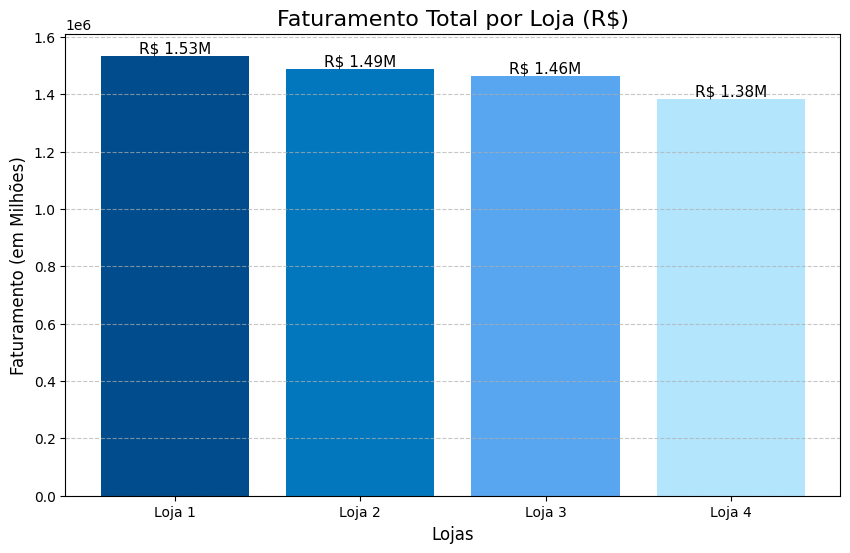

In [4]:
import matplotlib.pyplot as plt

# (Assumindo que 'resultados_faturamento' já existe da etapa anterior)
# Ex: {'Loja 1': 5018318.0, 'Loja 2': 4947442.0, ...}

# 1. Preparar os dados dinamicamente a partir do dicionário
lojas = list(resultados_faturamento.keys())
faturamentos = list(resultados_faturamento.values())

# 2. Criar a figura e os eixos
plt.figure(figsize=(10, 6))
cores_barra = ['#004c8c', '#0277bd', '#58a5f0', '#b3e5fc'] # Paleta de cores
plt.bar(lojas, faturamentos, color=cores_barra)

# 3. Adicionar títulos e rótulos
plt.title('Faturamento Total por Loja (R$)', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento (em Milhões)', fontsize=12)

# 4. Adicionar rótulos de dados (valores) em cima das barras
for i, fat in enumerate(faturamentos):
    espaco_superior = 10000 # Define o espaço acima da barra

    plt.text(i, fat + espaco_superior, # Posição (x, y)
             f"R$ {fat/1000000:.2f}M",  # Texto formatado
             ha='center', fontsize=11)

# 5. Adicionar grade e mostrar o gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# 2. Vendas por Categoria

In [6]:
# 1. Criar nossa função de contagem (reutilizável!)
def contar_categorias(lista_vendas: list) -> dict:
    """
    Conta a ocorrência de cada categoria de produto em uma lista de vendas.
    """
    contagem = {}

    # Usando o loop FOR para percorrer a LISTA
    for venda in lista_vendas:
        # Pegando a categoria de cada venda
        categoria = venda['Categoria do Produto']

        # Usando .get() é uma forma mais limpa de fazer o if/else
        # .get(categoria, 0) tenta pegar o valor; se falhar (nova), usa 0
        contagem[categoria] = contagem.get(categoria, 0) + 1

    return contagem

# 2. Calcular e ver os resultados de cada loja (de forma dinâmica)
print("--- Contagem de Vendas por Categoria ---")

# Dicionário para guardar todos os resultados
resultados_categorias = {}

# Loop único para calcular e imprimir os resultados
for nome_loja, vendas_loja in dados_por_loja.items():

    # 1. Calcula a contagem para a loja atual
    contagem_loja = contar_categorias(vendas_loja)

    # 2. Armazena o resultado
    resultados_categorias[nome_loja] = contagem_loja

    # 3. Imprime de forma formatada
    print(f"\n{nome_loja.upper()}:")
    print(contagem_loja)

# 'resultados_categorias' agora contém todos os dados para os gráficos


--- Contagem de Vendas por Categoria ---

LOJA 1:
{'eletronicos': 448, 'moveis': 465, 'brinquedos': 324, 'eletrodomesticos': 312, 'utilidades domesticas': 171, 'esporte e lazer': 284, 'livros': 173, 'instrumentos musicais': 182}

LOJA 2:
{'moveis': 442, 'instrumentos musicais': 224, 'esporte e lazer': 275, 'eletronicos': 422, 'utilidades domesticas': 181, 'brinquedos': 313, 'eletrodomesticos': 305, 'livros': 197}

LOJA 3:
{'eletrodomesticos': 278, 'moveis': 499, 'instrumentos musicais': 177, 'esporte e lazer': 277, 'eletronicos': 451, 'brinquedos': 315, 'utilidades domesticas': 177, 'livros': 185}

LOJA 4:
{'eletrodomesticos': 254, 'moveis': 480, 'esporte e lazer': 277, 'livros': 187, 'eletronicos': 451, 'instrumentos musicais': 170, 'brinquedos': 338, 'utilidades domesticas': 201}


In [7]:
# 1. Criar nossa função de contagem (reutilizável!)
def contar_categorias(lista_vendas: list) -> dict:
    """
    Conta a ocorrência de cada categoria de produto em uma lista de vendas.
    """
    contagem = {}

    # Usando o loop FOR para percorrer a LISTA
    for venda in lista_vendas:
        # Pegando a categoria de cada venda
        categoria = venda['Categoria do Produto']

        # Usando .get() para simplificar a lógica if/else
        contagem[categoria] = contagem.get(categoria, 0) + 1

    return contagem

# 2. Criar uma função "helper" para ordenar nossos dicionários
def ordenar_contagem(dicionario_contagem: dict) -> list:
    """
    Ordena um dicionário de contagem pelo valor (contagem),
    do maior para o menor.
    Retorna uma lista de tuplas (chave, valor).
    """
    # A lógica sorted() com lambda é a forma mais eficiente para isso
    itens_ordenados = sorted(
        dicionario_contagem.items(),
        key=lambda item: item[1], # Ordena pelo item [1] (o valor/contagem)
        reverse=True
    )
    return itens_ordenados

# 3. Calcular e Ordenar os resultados (de forma dinâmica)
print("--- Vendas por Categoria (Mais Populares) ---")

# Dicionário para guardar todos os resultados finais e ordenados
resultados_categorias_ordenados = {}

# Loop único para calcular, ordenar e imprimir os resultados
for nome_loja, vendas_loja in dados_por_loja.items():

    # 1. Calcula a contagem para a loja atual
    contagem_bruta = contar_categorias(vendas_loja)

    # 2. Ordena a contagem
    contagem_ordenada = ordenar_contagem(contagem_bruta)

    # 3. Armazena o resultado final
    resultados_categorias_ordenados[nome_loja] = contagem_ordenada

    # 4. Imprime de forma formatada
    print(f"\n{nome_loja.upper()}:")
    print(contagem_ordenada)

# 'resultados_categorias_ordenados' agora contém todos os dados
# prontos para os gráficos de pizza.

--- Vendas por Categoria (Mais Populares) ---

LOJA 1:
[('moveis', 465), ('eletronicos', 448), ('brinquedos', 324), ('eletrodomesticos', 312), ('esporte e lazer', 284), ('instrumentos musicais', 182), ('livros', 173), ('utilidades domesticas', 171)]

LOJA 2:
[('moveis', 442), ('eletronicos', 422), ('brinquedos', 313), ('eletrodomesticos', 305), ('esporte e lazer', 275), ('instrumentos musicais', 224), ('livros', 197), ('utilidades domesticas', 181)]

LOJA 3:
[('moveis', 499), ('eletronicos', 451), ('brinquedos', 315), ('eletrodomesticos', 278), ('esporte e lazer', 277), ('livros', 185), ('instrumentos musicais', 177), ('utilidades domesticas', 177)]

LOJA 4:
[('moveis', 480), ('eletronicos', 451), ('brinquedos', 338), ('esporte e lazer', 277), ('eletrodomesticos', 254), ('utilidades domesticas', 201), ('livros', 187), ('instrumentos musicais', 170)]


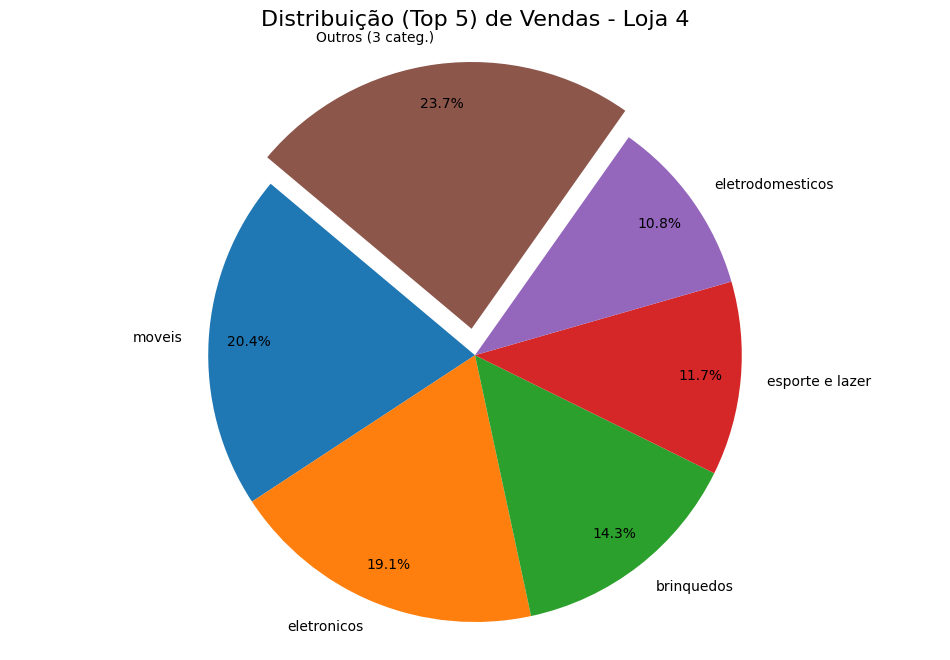

In [8]:
import matplotlib.pyplot as plt

# Ex: {'Loja 4': [('Eletrônicos', 50), ('Roupas', 30), ...]}

# --- 1. Função Helper (idealmente, definida em uma célula anterior) ---
def preparar_dados_pizza(lista_ordenada: list, top_n: int = 5):
    """
    Prepara dados para um gráfico de pizza legível, pegando o Top N
    e agrupando todo o restante em uma única fatia 'Outros'.
    """
    # 1. Separar os itens do Top N e o restante
    top_items = lista_ordenada[:top_n]
    outros_items = lista_ordenada[top_n:]

    # 2. Preparar as listas de categorias e contagens
    categorias = [item[0] for item in top_items]
    contagens = [item[1] for item in top_items]

    # 3. Calcular e adicionar a fatia "Outros" (se houver)
    if outros_items: # Verifica se a lista 'outros_items' não está vazia
        contagem_outros = sum(item[1] for item in outros_items)

        # Adiciona 'Outros' apenas se a soma for maior que zero
        if contagem_outros > 0:
            # Um rótulo mais descritivo para a fatia "Outros"
            categorias.append(f'Outros ({len(outros_items)} categ.)')
            contagens.append(contagem_outros)

    return categorias, contagens

# --- 2. Preparar os dados da Loja 4 (de forma dinâmica) ---

# Define qual loja e quantas fatias principais queremos ver
loja_alvo = 'Loja 4'
n_fatias = 5 # Mostra as 5 categorias principais, o resto vira "Outros"

# Pega os dados brutos (já ordenados!) daquela loja
dados_brutos_loja4 = resultados_categorias_ordenados[loja_alvo]

# Processa os dados usando a função helper
categorias, contagens = preparar_dados_pizza(dados_brutos_loja4, top_n=n_fatias)

# --- 3. Criar o Gráfico de Pizza (Mais legível) ---
plt.figure(figsize=(12, 8))

# 'explode' ajuda a destacar a última fatia ('Outros')
# Cria uma lista de zeros e coloca 0.1 no último item
explode = [0] * len(contagens)
if len(contagens) > n_fatias: # Se a fatia 'Outros' existir
    explode[-1] = 0.1 # Destaca a última fatia

# 'pctdistance' move o rótulo de porcentagem para dentro
plt.pie(contagens,
        labels=categorias,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85,
        explode=explode)

# --- 4. Adicionar Título Dinâmico ---
plt.title(f'Distribuição (Top {n_fatias}) de Vendas - {loja_alvo}', fontsize=16)
plt.axis('equal') # Garante que a pizza seja um círculo perfeito

# 5. Mostrar o gráfico
plt.show()

# 3. Média de Avaliação das Lojas


In [10]:
# 1. Criar nossa função para calcular a média "na mão"
def calcular_media_avaliacao(lista_vendas: list) -> float:
    """
    Calcula a média de avaliação de uma loja usando loops nativos.
    """
    soma_avaliacoes = 0.0

    # Usando o loop FOR para somar todas as avaliações
    for venda in lista_vendas:
        soma_avaliacoes += venda['Avaliação da compra']

    # Calculando o total de vendas
    total_vendas = len(lista_vendas)

    # Calculando a média (soma / total)
    if total_vendas > 0:
        media = soma_avaliacoes / total_vendas
        return media
    else:
        return 0.0 # Caso a loja não tenha vendas

# 2. Calcular e ver os resultados de cada loja (de forma dinâmica)
print("--- Média de Avaliação (1 a 5 estrelas) ---")

# Dicionário para guardar os resultados
resultados_media_avaliacao = {}

# Loop único para calcular, armazenar e imprimir
for nome_loja, vendas_loja in dados_por_loja.items():

    # 1. Calcula
    media_loja = calcular_media_avaliacao(vendas_loja)

    # 2. Armazena
    resultados_media_avaliacao[nome_loja] = media_loja

    # 3. Imprime
    print(f"{nome_loja}: {media_loja:.2f} estrelas")

# 'resultados_media_avaliacao' está pronto para ser usado em gráficos

--- Média de Avaliação (1 a 5 estrelas) ---
Loja 1: 3.98 estrelas
Loja 2: 4.04 estrelas
Loja 3: 4.05 estrelas
Loja 4: 4.00 estrelas


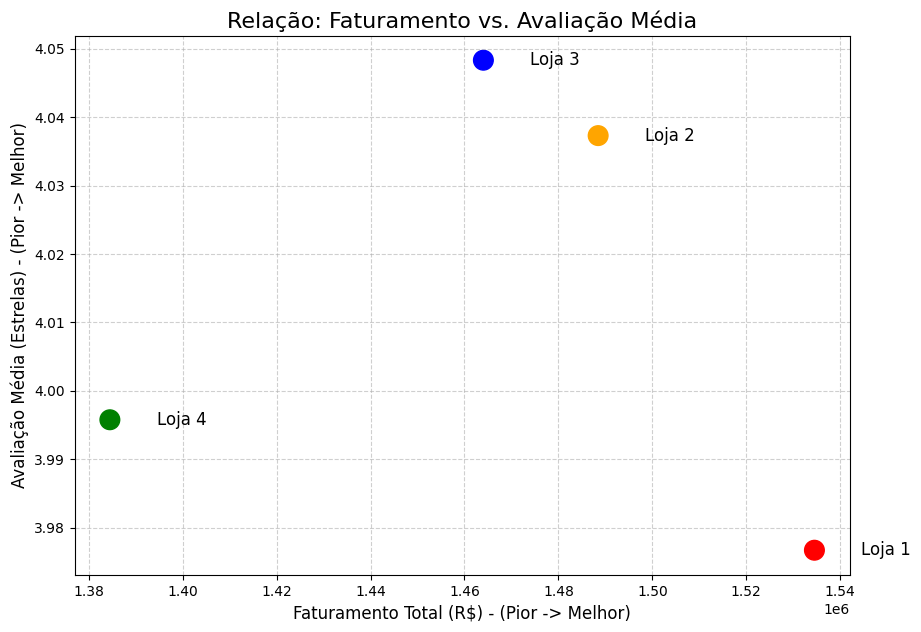

In [15]:
import matplotlib.pyplot as plt

# --- 1. Preparar os dados de forma dinâmica ---

# Define um mapa de cores fixo por loja, para garantir consistência
cor_mapa = {
    'Loja 1': 'red',
    'Loja 2': 'orange',
    'Loja 3': 'blue',
    'Loja 4': 'green'
}

# Usa os nomes das lojas como a "fonte da verdade" para a ordem
lojas = list(resultados_faturamento.keys())

# Constrói as listas de dados na ordem correta, usando os nomes das lojas
faturamentos = list(resultados_faturamento.values())
avaliacoes = [resultados_media_avaliacao[loja] for loja in lojas]
cores = [cor_mapa[loja] for loja in lojas] # Mapeia as cores na ordem certa

# --- 2. Criar o Gráfico de Dispersão (Scatter Plot) ---
plt.figure(figsize=(10, 7))
# s=200 -> Tamanho dos pontos (para ficarem bem visíveis)
plt.scatter(faturamentos, avaliacoes, s=200, c=cores)

# --- 3. Adicionar títulos e rótulos ---
plt.title('Relação: Faturamento vs. Avaliação Média', fontsize=16)
plt.xlabel('Faturamento Total (R$) - (Pior -> Melhor)', fontsize=12)
plt.ylabel('Avaliação Média (Estrelas) - (Pior -> Melhor)', fontsize=12)

# --- 4. Adicionar os rótulos em cada ponto ---
# O loop 'for i, nome in enumerate(lojas)' já está correto e dinâmico
for i, nome in enumerate(lojas):
    # Posição (x + um espacinho, y)
    plt.text(faturamentos[i] + 10000, avaliacoes[i],
             nome, fontsize=12, va='center')

# --- 5. Adicionar grid para facilitar a leitura dos quadrantes ---
plt.grid(True, linestyle='--', alpha=0.6)

# --- 6. Mostrar o gráfico ---
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [16]:
# 1. Função para contar e já ordenar os produtos
def rankear_produtos(lista_vendas: list) -> list:
    """
    Conta a ocorrência de cada produto e retorna uma lista ordenada
    dos mais vendidos para os menos vendidos.
    """
    contagem_produto = {}

    # Loop FOR para contar cada produto
    for venda in lista_vendas:
        # Acessando a chave 'Produto'
        produto = venda['Produto']

        # Usando .get() para simplificar a lógica if/else
        contagem_produto[produto] = contagem_produto.get(produto, 0) + 1

    # Ordena o dicionário pelos valores (contagem)
    itens_ordenados = sorted(
        contagem_produto.items(),
        key=lambda item: item[1], # Ordena pelo item [1] (valor)
        reverse=True
    )
    return itens_ordenados

# 2. Calcular e mostrar os rankings de cada loja (de forma dinâmica)
print("--- Ranking de Produtos (Mais e Menos Vendidos) ---")

# Dicionário para guardar todos os rankings
resultados_ranking_produtos = {}

# Loop único para calcular, armazenar e imprimir
for nome_loja, vendas_loja in dados_por_loja.items():

    # 1. Calcula o ranking
    ranking_loja = rankear_produtos(vendas_loja)

    # 2. Armazena o ranking completo
    resultados_ranking_produtos[nome_loja] = ranking_loja

    # 3. Imprime os resultados formatados
    print(f"\n{nome_loja.upper()}:")
    print(f"  Mais vendidos: {ranking_loja[:5]}") # Mostra o Top 5
    print(f"  Menos vendidos: {ranking_loja[-5:]}") # Mostra o Bottom 5

# 'resultados_ranking_produtos' agora contém as listas completas
# de ranking para todas as lojas.

--- Ranking de Produtos (Mais e Menos Vendidos) ---

LOJA 1:
  Mais vendidos: [('Micro-ondas', 60), ('TV Led UHD 4K', 60), ('Guarda roupas', 60), ('Secadora de roupas', 58), ('Blocos de montar', 56)]
  Menos vendidos: [('Mochila', 39), ('Pandeiro', 36), ('Panela de pressão', 35), ('Headset', 33), ('Celular ABXY', 33)]

LOJA 2:
  Mais vendidos: [('Iniciando em programação', 65), ('Micro-ondas', 62), ('Bateria', 61), ('Pandeiro', 58), ('Violão', 58)]
  Menos vendidos: [('Fone de ouvido', 37), ('Poltrona', 35), ('Mesa de jantar', 34), ('Impressora', 34), ('Jogo de tabuleiro', 32)]

LOJA 3:
  Mais vendidos: [('Kit banquetas', 57), ('Mesa de jantar', 56), ('Cama king', 56), ('Cômoda', 55), ('Jogo de panelas', 55)]
  Menos vendidos: [('Copo térmico', 38), ('Jogo de copos', 36), ('Mochila', 36), ('Micro-ondas', 36), ('Blocos de montar', 35)]

LOJA 4:
  Mais vendidos: [('Cama box', 62), ('Faqueiro', 59), ('Dashboards com Power BI', 56), ('Cama king', 56), ('Cômoda', 55)]
  Menos vendidos: [('L

# 5. Frete Médio por Loja

In [17]:
# 1. Criar nossa função para calcular a média do frete "na mão"
def calcular_media_frete(lista_vendas: list) -> float:
    """
    Calcula o valor médio do frete por venda para uma loja.
    """
    soma_frete = 0.0

    # Usando o loop FOR para somar todos os fretes
    for venda in lista_vendas:
        soma_frete += venda['Frete']

    # Calculando o total de vendas
    total_vendas = len(lista_vendas)

    # Calculando a média (soma / total)
    if total_vendas > 0:
        media = soma_frete / total_vendas
        return media
    else:
        return 0.0 # Caso a loja não tenha vendas

# 2. Calcular e ver os resultados de cada loja (de forma dinâmica)
print("--- Frete Médio por Venda (R$) ---")

# Dicionário para guardar os resultados
resultados_media_frete = {}

# Loop único para calcular, armazenar e imprimir
for nome_loja, vendas_loja in dados_por_loja.items():

    # 1. Calcula
    media_frete = calcular_media_frete(vendas_loja)

    # 2. Armazena
    resultados_media_frete[nome_loja] = media_frete

    # 3. Imprime
    print(f"{nome_loja}: R$ {media_frete:.2f}")

# 'resultados_media_frete' está pronto para ser usado em gráficos

--- Frete Médio por Venda (R$) ---
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


# Relatório Final de Análise: Lojas Alura Store

Este relatório apresenta uma análise dos dados de vendas de quatro lojas da Alura Store, focando em faturamento, vendas por categoria, avaliação média, produtos mais/menos vendidos e frete médio.

## 1. Análise do Faturamento

O faturamento total de cada loja foi calculado, mostrando a performance financeira individual.

*   **Loja 1:** R$ {{resultados_faturamento['Loja 1']:.2f}}
*   **Loja 2:** R$ {{resultados_faturamento['Loja 2']:.2f}}
*   **Loja 3:** R$ {{resultados_faturamento['Loja 3']:.2f}}
*   **Loja 4:** R$ {{resultados_faturamento['Loja 4']:.2f}}

O gráfico de barras acima ilustra a comparação visual desses faturamentos.

## 2. Vendas por Categoria

A distribuição das vendas por categoria de produto foi analisada para cada loja, identificando as categorias mais e menos populares.

Os resultados de contagem por categoria para cada loja foram:
*   **Loja 1:** {{resultados_categorias['Loja 1']}}
*   **Loja 2:** {{resultados_categorias['Loja 2']}}
*   **Loja 3:** {{resultados_categorias['Loja 3']}}
*   **Loja 4:** {{resultados_categorias['Loja 4']}}

Os gráficos de pizza (exemplo da Loja 4 mostrado acima) visualizam a proporção de vendas por categoria, com destaque para as Top 5 e agrupamento das demais em 'Outros'.

## 3. Média de Avaliação das Lojas

A avaliação média das compras em cada loja foi calculada, fornecendo insights sobre a satisfação do cliente.

*   **Loja 1:** {{resultados_media_avaliacao['Loja 1']:.2f}} estrelas
*   **Loja 2:** {{resultados_media_avaliacao['Loja 2']:.2f}} estrelas
*   **Loja 3:** {{resultados_media_avaliacao['Loja 3']:.2f}} estrelas
*   **Loja 4:** {{resultados_media_avaliacao['Loja 4']:.2f}} estrelas

O gráfico de dispersão acima ("Relação: Faturamento vs. Avaliação Média") relaciona o faturamento total com a avaliação média, permitindo identificar possíveis correlações.

## 4. Produtos Mais e Menos Vendidos

Foram identificados os produtos mais e menos vendidos em cada loja, revelando o desempenho individual de cada item.

Os Top 5 produtos mais e menos vendidos em cada loja foram:
*   **Loja 1:** Mais vendidos: {{resultados_ranking_produtos['Loja 1'][:5]}}, Menos vendidos: {{resultados_ranking_produtos['Loja 1'][-5:]}}
*   **Loja 2:** Mais vendidos: {{resultados_ranking_produtos['Loja 2'][:5]}}, Menos vendidos: {{resultados_ranking_produtos['Loja 2'][-5:]}}
*   **Loja 3:** Mais vendidos: {{resultados_ranking_produtos['Loja 3'][:5]}}, Menos vendidos: {{resultados_ranking_produtos['Loja 3'][-5:]}}
*   **Loja 4:** Mais vendidos: {{resultados_ranking_produtos['Loja 4'][:5]}}, Menos vendidos: {{resultados_ranking_produtos['Loja 4'][-5:]}}


## 5. Frete Médio por Loja

O valor médio do frete por venda foi calculado para cada loja, analisando o impacto dos custos de envio.

*   **Loja 1:** R$ {{resultados_media_frete['Loja 1']:.2f}}
*   **Loja 2:** R$ {{resultados_media_frete['Loja 2']:.2f}}
*   **Loja 3:** R$ {{resultados_media_frete['Loja 3']:.2f}}
*   **Loja 4:** R$ {{resultados_media_frete['Loja 4']:.2f}}

## Conclusão

Esta análise fornece uma visão abrangente do desempenho de cada loja da Alura Store, destacando áreas de sucesso e potenciais pontos de melhoria com base nos dados de vendas, categorias, avaliações e frete.